# Application of Bootstrap samples in Random Forest

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.tree import DecisionTreeRegressor as dtr

 <li> Load the boston house dataset </li>

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
x=boston.data #independent variables

y=boston.target #target variable
print('x shape:',x.shape)
y=y.reshape(-1,1)
print('y shape:',y.shape)


x shape: (506, 13)
y shape: (506, 1)


# <CENTER> TASK 1

In [11]:
mse=[]
oob=[]
for i in tqdm(range(0,35)):
    Grid = [0]*1
    for i in range(1):
        Grid = [0]*30
    model_grid=Grid

# Collecting row and column indices
    row_idx=[]
    col_idx=[]
    for i in range(30):
        s1=np.random.randint(0,len(y),303)
        s2=np.random.choice(s1,203)
        row_idx.append(np.concatenate((s1,s2)))
        r=random.randint(3,13)
        col_idx.append(np.random.randint(0,13,r))  

# Training models


    ypred=np.zeros(len(y))
    for i in range(30):
        xsample=x[row_idx[i]]
        xsample=xsample[:,col_idx[i]]
        ysample=y[row_idx[i]]
        model=dtr()
        model.fit(xsample,ysample)
        model_grid[i]=model
        ypred+=model.predict(x[:,col_idx[i]])
    ypred=ypred/30
    mse.append(mean_squared_error(y,ypred))
    
    

    model_indices=[]
    for i in range(0,30):
        model_indices.append(row_idx[i])
    data_point_not_trained_models=[]
    for i in range(506):
        l=[]
        for j in range(30):
             if i not in model_indices[j]:
                l.append(j+1)
        data_point_not_trained_models.append(l)

    Grid = [0]*506

    for i in range(506):
        Grid[i] = [0]*30



    for i in range(506):
        for j in range(30):
            Grid[i][j]=x[i,col_idx[j]].reshape(1,-1)
    data_points_grid=Grid


    y_oob_pred=[]
    for i in range(506):
        y_oob=0
        for j in data_point_not_trained_models[i]:
            y_oob+=model_grid[j-1].predict(data_points_grid[i][j-1])
        y_oob_pred.append(y_oob/len(data_point_not_trained_models[i]))
    oob.append(mean_squared_error(y,(y_oob_pred)))

100%|██████████████████████████████████████████| 35/35 [00:52<00:00,  1.48s/it]


In [13]:
np.array(oob)

array([15.52256614, 15.90778205, 15.81345736, 19.08361774, 12.6792253 ,
       17.36456745, 16.82128854, 14.70249736, 14.62325249, 16.12941106,
       16.37112614, 18.71209361, 19.93256963, 16.37518322, 14.1941682 ,
       15.86640818, 17.97075384, 17.02370105, 16.25026452, 15.9630216 ,
       17.80152271, 16.96302482, 15.98547477, 14.68016799, 16.75188701,
       16.81577872, 16.21105909, 16.4851136 , 18.27609346, 16.23614999,
       18.61543487, 14.94834735, 15.70637592, 15.6677286 , 16.36816789])

In [14]:
np.array(mse)

array([4.92903866, 5.06867885, 4.93791454, 5.81309411, 4.01011089,
       5.58866944, 5.9706825 , 4.57088407, 4.19050621, 5.61724986,
       5.50057932, 7.27454541, 6.62589681, 4.90617987, 4.39180995,
       4.717364  , 5.49566167, 5.40525278, 5.52683694, 5.15889324,
       5.73141529, 5.59274698, 5.6971749 , 4.94651573, 5.0658553 ,
       5.73434096, 5.17080152, 5.47871583, 5.78901358, 5.30300255,
       6.4182017 , 4.32716214, 4.7844109 , 5.32234386, 5.42054326])

# <CENTER> TASK 2

Text(0.5, 1.0, 'MSE VALUES')

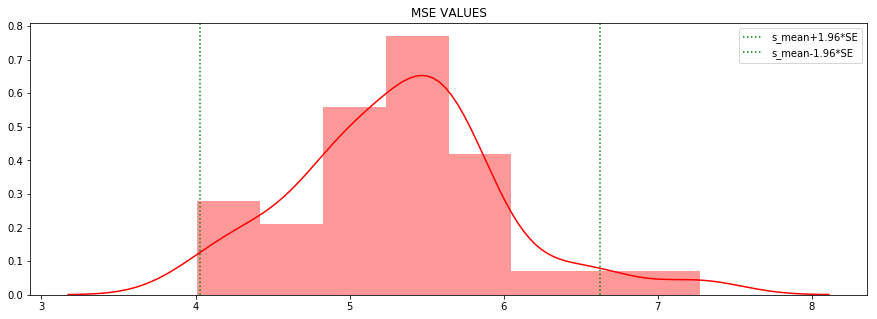

In [16]:
# Computing CI of OOB Score and TRAIN MSE

x_bar=np.array(mse).mean()
# Standard Error[S.E]
SE=np.array(mse).std()
upper_limit=x_bar+(SE*1.96)
lower_limit=x_bar-(SE*1.96)

fig,ax=plt.subplots(1,figsize=(15,5))
sns.distplot(np.array(mse),ax=ax,color='r')
ax.axvline(upper_limit, linestyle=":", color='g', label="s_mean+1.96*SE")
ax.axvline(lower_limit, linestyle=":", color='g', label="s_mean-1.96*SE")
ax.legend()
ax.set_title('MSE VALUES')

In [18]:
lower_limit

4.031378861674906

In [24]:
upper_limit

6.624740771620818

# INTERPRETING MSE CONFIDENCE INTERVAL:
  The confidence interval plot with U.L=6.62 and  L.L= 4.03, shows that 95% of MSE  values lie in this limit

Text(0.5, 1.0, 'OOB SCORE')

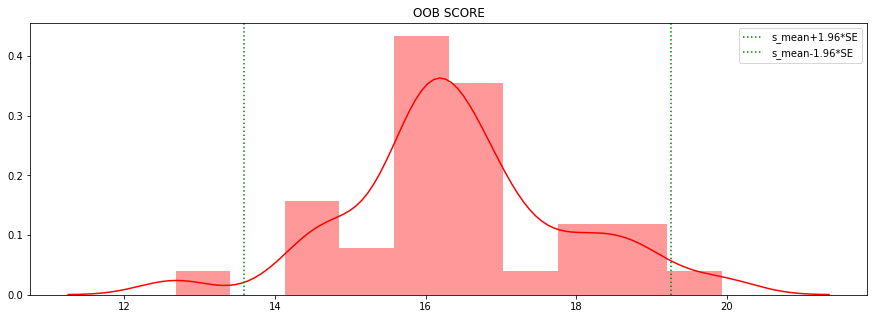

In [20]:
x_bar_oob=np.array(oob).mean()
# Standard Error[S.E]
SE_oob=np.array(oob).std()
upper_limit_oob=x_bar_oob+(SE_oob*1.96)
lower_limit_oob=x_bar_oob-(SE_oob*1.96)

fig,ax=plt.subplots(1,figsize=(15,5))
sns.distplot(np.array(oob),ax=ax,color='r')
ax.axvline(upper_limit_oob, linestyle=":", color='g', label="s_mean+1.96*SE")
ax.axvline(lower_limit_oob, linestyle=":", color='g', label="s_mean-1.96*SE")
ax.legend()
ax.set_title('OOB SCORE')

In [22]:
lower_limit_oob

13.593169484398816

In [23]:
upper_limit_oob

19.25364664534129

# INTERPRETING OOB SCORE CONFIDENCE INTERVAL:
  The confidence interval plot with U.L=19.25 and  L.L= 13.59, shows that 95% of OOB SCORE values lie in this limit

# <center> TASK 3

In [135]:
xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60]
xq=np.array(xq).reshape(1,-1)

price=0

for i in range(30):
    price+=model_grid[i].predict(xq[:,col_idx[i]])    
print('PREDICTED PRICE:',price/30)

PREDICTED PRICE: [18.69]
